In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [35]:
data = pd.DataFrame(pd.read_csv('housing.csv'))
data = data.drop(['ocean_proximity', 'total_bedrooms'], axis=1)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   population          20640 non-null  int64  
 5   households          20640 non-null  int64  
 6   median_income       20640 non-null  float64
 7   median_house_value  20640 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


In [19]:
data.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


In [38]:
def featureNormaliation(X):
    mean = np.mean(X, axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X-mean)/std
    return X_norm

In [39]:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)

In [41]:
y_train = featureNormaliation(y_train)
y_test = featureNormaliation(y_test)
for i in range(X_train.shape[1]):
    X_train[:, i] = featureNormaliation(X_train[:, i])
    X_test[:, i] = featureNormaliation(X_test[:, i])

In [42]:
def add_intercept(x):
    new_x = np.zeros((x.shape[0], x.shape[1]+1), dtype=x.dtype)
    new_x[:, 0] = 1
    new_x[:, 1:] = x
    
    return new_x

In [161]:
class LinearModel(object):
    def __init__(self, max_iter=2000, alpha=0.0000000005):
        self.max_iter = max_iter
        self.alpha = alpha
        
    def fit(self, x, y):
        raise NotImplementedError('Subclass of LinearModel must implement fit method.')
        
    def predict(self, x, y):
        raise NotImplementedError('Subclass of LinearModel must implement fit method.')

In [165]:
class LinearRegression(LinearModel):
    def fit(self, x, y):
        m, n = X.shape
        self.theta = np.random.rand(n)
        print(self.theta)
        alpha = self.alpha
        J_history = []
        
        for i in range(self.max_iter):
            h_x = x.dot(self.theta)
            gradient_J_theta = x.T.dot(y - h_x)
            
            J = (1/2)*np.sum(np.square(h_x - y))
            
            self.theta += alpha * gradient_J_theta
    
            print(f"cost is: {J}")
            J_history.append(J)
        
        return self.theta, J_history
    
    def predict(self, x, y):
        return x.dot(self.theta)

In [166]:
model = LinearRegression()

In [167]:
theta, J = model.fit(X_train, y_train)

[0.79463704 0.12409669 0.11484676 0.54314496 0.90584071 0.88211319
 0.60048562]
cost is: 50542.18334704942
cost is: 50539.97322933074
cost is: 50537.76322017584
cost is: 50535.55331957933
cost is: 50533.343527535864
cost is: 50531.13384404006
cost is: 50528.92426908655
cost is: 50526.71480266997
cost is: 50524.50544478496
cost is: 50522.29619542614
cost is: 50520.087054588155
cost is: 50517.87802226563
cost is: 50515.66909845321
cost is: 50513.46028314552
cost is: 50511.2515763372
cost is: 50509.04297802289
cost is: 50506.834488197215
cost is: 50504.62610685482
cost is: 50502.41783399034
cost is: 50500.20966959839
cost is: 50498.00161367364
cost is: 50495.79366621072
cost is: 50493.585827204246
cost is: 50491.37809664886
cost is: 50489.17047453923
cost is: 50486.962960869954
cost is: 50484.7555556357
cost is: 50482.548258831084
cost is: 50480.34107045076
cost is: 50478.13399048937
cost is: 50475.92701894153
cost is: 50473.7201558019
cost is: 50471.513401065116
cost is: 50469.3067547258

cost is: 48989.33782370607
cost is: 48987.20397487603
cost is: 48985.070230838755
cost is: 48982.936591589096
cost is: 48980.80305712184
cost is: 48978.66962743183
cost is: 48976.53630251387
cost is: 48974.40308236279
cost is: 48972.26996697341
cost is: 48970.13695634054
cost is: 48968.004050459014
cost is: 48965.87124932363
cost is: 48963.73855292925
cost is: 48961.60596127066
cost is: 48959.473474342696
cost is: 48957.341092140174
cost is: 48955.20881465792
cost is: 48953.07664189076
cost is: 48950.944573833505
cost is: 48948.81261048099
cost is: 48946.680751828026
cost is: 48944.54899786946
cost is: 48942.417348600095
cost is: 48940.285804014755
cost is: 48938.15436410827
cost is: 48936.023028875476
cost is: 48933.891798311175
cost is: 48931.76067241021
cost is: 48929.62965116739
cost is: 48927.49873457756
cost is: 48925.36792263553
cost is: 48923.23721533614
cost is: 48921.1066126742
cost is: 48918.97611464455
cost is: 48916.845721242
cost is: 48914.71543246141
cost is: 48912.58524

cost is: 47147.41325851056
cost is: 47145.369852901924
cost is: 47143.32654761468
cost is: 47141.28334264387
cost is: 47139.24023798453
cost is: 47137.19723363173
cost is: 47135.15432958047
cost is: 47133.11152582582
cost is: 47131.068822362824
cost is: 47129.026219186504
cost is: 47126.983716291914
cost is: 47124.9413136741
cost is: 47122.89901132808
cost is: 47120.85680924894
cost is: 47118.81470743169
cost is: 47116.77270587137
cost is: 47114.730804563056
cost is: 47112.68900350175
cost is: 47110.64730268254
cost is: 47108.60570210044
cost is: 47106.56420175051
cost is: 47104.522801627776
cost is: 47102.481501727314
cost is: 47100.44030204413
cost is: 47098.39920257331
cost is: 47096.358203309865
cost is: 47094.31730424888
cost is: 47092.27650538536
cost is: 47090.23580671438
cost is: 47088.195208230965
cost is: 47086.15470993019
cost is: 47084.11431180708
cost is: 47082.07401385669
cost is: 47080.033816074065
cost is: 47077.99371845426
cost is: 47075.95372099232
cost is: 47073.9138

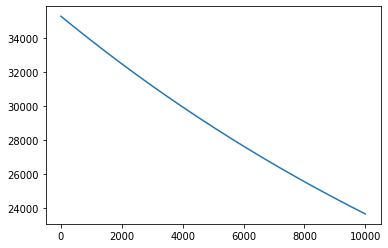

In [160]:
plt.plot(J)
plt.show()

In [156]:
np.random.rand(8)

array([0.53726296, 0.87707889, 0.54855011, 0.89421531, 0.47015018,
       0.53521362, 0.82468807, 0.80366405])